## COS-Holes + Literature Data Analysis

Since we are seeing a null result, we want to broaden our sample using previously published data and run some statistical analysis on the larger sample to see what kind of results it produces

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from linetools.spectralline import AbsLine
from linetools.spectra import io as lsio
from linetools.isgm.abscomponent import AbsComponent
from linetools.spectra.xspectrum1d import XSpectrum1D
from linetools.lists.linelist import LineList
import glob
import astropy
from astropy.io import ascii

#plotting things 
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 25

# update various fontsizes to match
params = {'figure.figsize': (20, 14),
          'legend.fontsize': 14,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.8 * fs,
          'ytick.labelsize': 0.8 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 10,
          'xtick.minor.size': 6,
          'ytick.major.size': 10,
          'ytick.minor.size': 6}
plt.rcParams.update(params)

In [12]:
#Bring in all the COS-Holes fit data
all_vp_df_J1101 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1101/all_vp.csv')
all_vp_df_J1159 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1159/all_vp.csv')
all_vp_df_J1249 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1249/all_vp.csv')
all_vp_df_J1051 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1051/all_vp.csv')
all_vp_df_J1123 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1123/all_vp.csv')
all_vp_df_J0246 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J0246/all_vp.csv')
all_vp_df_J1235 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1235/all_vp.csv')

In [13]:
#We care about the absorption features that we see around the galaxy so need to input the correct info for each one 
#Used some galaxy criterion to only see the lines that fit what I want to plot 

########################################
#J1101

gal_df_J1101 = all_vp_df_J1101.loc[(all_vp_df_J1101['trans']=='C IV')]

#J1101 Values to make new pd df
trans_J1101 = np.array(gal_df_J1101['trans'])
zsys_J1101 = np.array(gal_df_J1101['zsys'])
N_J1101 = np.array(gal_df_J1101['col'])
sigN_J1101 = np.array(gal_df_J1101['sigcol'])
b_J1101 = np.array(gal_df_J1101['bval'])
sigb_J1101 = np.array(gal_df_J1101['sigbval'])
vel_J1101 = np.array(gal_df_J1101['vel'])
sigvel_J1101 = np.array(gal_df_J1101['sigvel'])
wav_J1101 = np.array(gal_df_J1101['restwave'])

#smaller df 
civ_df_J1101= pd.DataFrame({"Line":trans_J1101, "Wavelength":wav_J1101, "zsys":zsys_J1101, "N":N_J1101, "sigN":sigN_J1101, 
                   "b":b_J1101, "sigb":sigb_J1101, "vel":vel_J1101, "sigvel":sigvel_J1101})

########################################
#J1159

gal_df_J1159 = all_vp_df_J1159.loc[(all_vp_df_J1159['trans']=='C IV')]

#J1159 Values 
trans_J1159 = np.array(gal_df_J1159['trans'])
zsys_J1159 = np.array(gal_df_J1159['zsys'])
N_J1159 = np.array(gal_df_J1159['col'])
sigN_J1159 = np.array(gal_df_J1159['sigcol'])
b_J1159 = np.array(gal_df_J1159['bval'])
sigb_J1159 = np.array(gal_df_J1159['sigbval'])
vel_J1159 = np.array(gal_df_J1159['vel'])
sigvel_J1159 = np.array(gal_df_J1159['sigvel'])
wav_J1159 = np.array(gal_df_J1159['restwave'])

#smaller df 
civ_df_J1159= pd.DataFrame({"Line":trans_J1159, "Wavelength":wav_J1159, "zsys":zsys_J1159, "N":N_J1159, "sigN":sigN_J1159, 
                   "b":b_J1159, "sigb":sigb_J1159, "vel":vel_J1159, "sigvel":sigvel_J1159})

########################################
#J1249

gal_df_J1249 = all_vp_df_J1249.loc[(all_vp_df_J1249['trans']=='C IV')]

#J1249 Values 
trans_J1249 = np.array(gal_df_J1249['trans'])
zsys_J1249 = np.array(gal_df_J1249['zsys'])
N_J1249 = np.array(gal_df_J1249['col'])
sigN_J1249 = np.array(gal_df_J1249['sigcol'])
b_J1249 = np.array(gal_df_J1249['bval'])
sigb_J1249 = np.array(gal_df_J1249['sigbval'])
vel_J1249 = np.array(gal_df_J1249['vel'])
sigvel_J1249 = np.array(gal_df_J1249['vel'])
wav_J1249 = np.array(gal_df_J1249['restwave'])

#smaller df 
civ_df_J1249= pd.DataFrame({"Line":trans_J1249, "Wavelength":wav_J1249, "zsys":zsys_J1249, "N":N_J1249, "sigN":sigN_J1249, 
                   "b":b_J1249, "sigb":sigb_J1249, "vel":vel_J1249, "sigvel":sigvel_J1249})

########################################
#J1051

gal_df_J1051 = all_vp_df_J1051.loc[(all_vp_df_J1051['trans']=='C IV')] 

#J1051 Values 
trans_J1051 = np.array(gal_df_J1051['trans'])
zsys_J1051 = np.array(gal_df_J1051['zsys'])
N_J1051 = np.array(gal_df_J1051['col'])
sigN_J1051 = np.array(gal_df_J1051['sigcol'])
b_J1051 = np.array(gal_df_J1051['bval'])
sigb_J1051 = np.array(gal_df_J1051['sigbval'])
vel_J1051 = np.array(gal_df_J1051['vel'])
sigvel_J1051 = np.array(gal_df_J1051['sigvel'])
wav_J1051 = np.array(gal_df_J1051['restwave'])

#smaller df 
civ_df_J1051= pd.DataFrame({"Line":trans_J1051, "Wavelength":wav_J1051, "zsys":zsys_J1051, "N":N_J1051, "sigN":sigN_J1051, 
                   "b":b_J1051, "sigb":sigb_J1051, "vel":vel_J1051, "sigvel":sigvel_J1051})

########################################
#J1123

gal_df_J1123 = all_vp_df_J1123.loc[(all_vp_df_J1123['trans']=='C IV')]

#J1123 Values 
trans_J1123 = np.array(gal_df_J1123['trans'])
zsys_J1123 = np.array(gal_df_J1123['zsys'])
N_J1123 = np.array(gal_df_J1123['col'])
sigN_J1123 = np.array(gal_df_J1123['sigcol'])
b_J1123 = np.array(gal_df_J1123['bval'])
sigb_J1123 = np.array(gal_df_J1123['sigbval'])
vel_J1123 = np.array(gal_df_J1123['vel'])
sigvel_J1123 = np.array(gal_df_J1123['sigvel'])
wav_J1123 = np.array(gal_df_J1123['restwave'])

#smaller df 
civ_df_J1123= pd.DataFrame({"Line":trans_J1123, "Wavelength":wav_J1123, "zsys":zsys_J1123, "N":N_J1123, "sigN":sigN_J1123, 
                   "b":b_J1123, "sigb":sigb_J1123, "vel":vel_J1123, "sigvel":sigvel_J1123})

########################################
#J0246

gal_df_J0246 = all_vp_df_J0246.loc[(all_vp_df_J0246['trans']=='C IV')] 

#J0246 Values 
trans_J0246= np.array(gal_df_J0246['trans'])
zsys_J0246 = np.array(gal_df_J0246['zsys'])
N_J0246 = np.array(gal_df_J0246['col'])
sigN_J0246 = np.array(gal_df_J0246['sigcol'])
b_J0246 = np.array(gal_df_J0246['bval'])
sigb_J0246 = np.array(gal_df_J0246['sigbval'])
vel_J0246 = np.array(gal_df_J0246['vel'])
sigvel_J0246 = np.array(gal_df_J0246['sigvel'])
wav_J0246 = np.array(gal_df_J0246['restwave'])

#smaller df 
civ_df_J0246= pd.DataFrame({"Line":trans_J0246, "Wavelength":wav_J0246, "zsys":zsys_J0246, "N":N_J0246, "sigN":sigN_J0246, 
                   "b":b_J0246, "sigb":sigb_J0246, "vel":vel_J0246, "sigvel":sigvel_J0246})

########################################
#J1235

gal_df_J1235 = all_vp_df_J1235.loc[(all_vp_df_J1235['trans']=='C IV')]

#J1235 Values 
trans_J1235= np.array(gal_df_J1235['trans'])
zsys_J1235 = np.array(gal_df_J1235['zsys'])
N_J1235 = np.array(gal_df_J1235['col'])
sigN_J1235 = np.array(gal_df_J1235['sigcol'])
b_J1235 = np.array(gal_df_J1235['bval'])
sigb_J1235 = np.array(gal_df_J1235['sigbval'])
vel_J1235 = np.array(gal_df_J1235['vel'])
sigvel_J1235 = np.array(gal_df_J1235['sigvel'])
wav_J1235 = np.array(gal_df_J1235['restwave'])

#smaller df - REMEMBER THIS IS A NON DETECTION
civ_df_J1235= pd.DataFrame({"Line":trans_J1235, "Wavelength":wav_J1235, "zsys":zsys_J1235, "N":N_J1235, "sigN":sigN_J1235, 
                   "b":b_J1235, "sigb":sigb_J1235, "vel":vel_J1235, "sigvel":sigvel_J1235})

In [14]:
#Known Galaxy Information 

gal_param_df = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/gal_param.csv')
#gal_param_df

#arrays for plotting 
gal = np.array(gal_param_df['galaxy'])
s_mass = np.array(gal_param_df['stellar mass'])
bh_mass = np.array(gal_param_df['BH mass'])
rvir = np.array(gal_param_df['Rvir'])
rproj = np.array(gal_param_df['Rproj'])

In [15]:
#Nicole Data (CHaNGA Models)

R25_HMbh_civ = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/R25_highMbh_logN_CIV.txt', 
                           sep=" ", header=None, names =['R25_HMbh_civ'])
R25_LMbh_civ = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/R25_lowMbh_logN_CIV.txt', 
                           sep=" ", header=None, names =['R25_LMbh_civ'])
R25_RpRv = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/R25_RoverRvir.txt', 
                       sep=" ", header=None, names =['R25_RpRv'])

R25_df = pd.concat([R25_HMbh_civ, R25_LMbh_civ, R25_RpRv], axis=1, join='inner')
#R25_df

#getting them out of the table
r25_highBH_civ = np.array(R25_df['R25_HMbh_civ'])
r25_lowBH_civ = np.array(R25_df['R25_LMbh_civ'])
r25_rprv = np.array(R25_df['R25_RpRv'])

#THIS IS THE NEW DATA THAT NICOLE SENT ME THAT IS JUST STARFORMING GALAXIES SO THAT WE CAN SEE THE DIFFERENCES 

#bringing in Nicole data 
COSChaNGA_HMbh_civ = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/COSholes_ChaNGa_highMbh_logN_CIV.txt', sep=" ", header=None, names =['CC_HMbh_civ'])
COSChaNGA_LMbh_civ = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/COSholes_ChaNGa_lowMbh_logN_CIV.txt', sep=" ", header=None, names =['CC_LMbh_civ'])
COSChaNGA_RpRv = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/COSholes_ChaNGa_RoverRvir.txt', sep=" ", header=None, names =['CC_RpRv'])

#taking them out to plot
CC_highBH_civ = np.array(COSChaNGA_HMbh_civ['CC_HMbh_civ'])
CC_lowBH_civ = np.array(COSChaNGA_LMbh_civ['CC_LMbh_civ'])
CC_rprv = np.array(COSChaNGA_RpRv['CC_RpRv'])

In [16]:
#Ben Data (EAGLE Models)  

BenHbh_df = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/high-M_SMBH_ben.csv')

b_benHbh = np.array(BenHbh_df['#b'])
med_benHbh = np.array(BenHbh_df['median'])
ben_25Hbh = np.array(BenHbh_df['25percentile'])
ben_75Hbh = np.array(BenHbh_df['75percentile'])

BenLbh_df = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/low-M_SMBH_ben.csv')

b_benLbh = np.array(BenLbh_df['#b'])
med_benLbh = np.array(BenLbh_df['median'])
ben_25Lbh = np.array(BenLbh_df['25percentile'])
ben_75Lbh = np.array(BenLbh_df['75percentile'])

In [4]:
#Borthakur 2013 Data
#https://iopscience.iop.org/article/10.1088/0004-637X/768/1/18/pdf

borthakur = pd.read_csv("/Users/samgarza/Documents/Sam_COSHoles_Analysis/borthakur_2013.csv", sep=",")   
borthakur.sort_values('det', inplace=True)
#borthakur

#remove the zero value in the df 
borthakur_no_zero = borthakur.drop(labels=12, axis=0)
#borthakur_no_zero

#arrays for plotting  
civ_B13 = np.array(borthakur_no_zero['logNCIV[i]'])
civ_err_B13 = np.array(borthakur_no_zero['err'])
det_B13 = np.array(borthakur_no_zero['det'])
RpRv_B13 = np.array(borthakur_no_zero['rhokpc[i]/rvir[i]']) #Rproj/Rvir 
Rp_B13 = np.array(borthakur_no_zero['rhokpc[i]'])

In [7]:
#Bordoloi 2014 Data 
#https://iopscience.iop.org/article/10.1088/0004-637X/796/2/136/pdf

bordoloi = pd.read_csv("/Users/samgarza/Documents/Sam_COSHoles_Analysis/bordoloi_2014_CIV.csv", sep=",") 
bordoloi.sort_values('det', inplace=True)
#bordoloi

#arrays for plotting 
civ_B14 = np.array(bordoloi['logNCIV'])
civ_err_B14 = np.array(bordoloi['err'])
det_B14 = np.array(bordoloi['det'])
RpRv_B14 = np.array(bordoloi['R/Rvir']) #Rproj/Rvir 
Rp_B14 = np.array(bordoloi['R[kpc]'])

In [10]:
#M31 Data (Project AMIGA) Detections (and taking out the MS contaminations) 

amiga_2_det_sum = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/amiga_2_det_sum.csv')
amiga_2_det_sum = amiga_2_det_sum.loc[(amiga_2_det_sum['sumlogN']!= 0)]
amiga_2_det_sum = amiga_2_det_sum.loc[amiga_2_det_sum['MS']==0]

#amiga_2_det_sum

In [9]:
#M31 Data (Project AMIGA) non-detections (and taking out the MS contamination) 
amiga_2_up_sum = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/amiga_2_up_sum.csv')
amiga_2_up_sum = amiga_2_up_sum.loc[(amiga_2_up_sum['sumlogN']!= 0)]
amiga_2_up_sum = amiga_2_up_sum.loc[(amiga_2_up_sum['MS']== 0)]

#amiga_2_up_sum

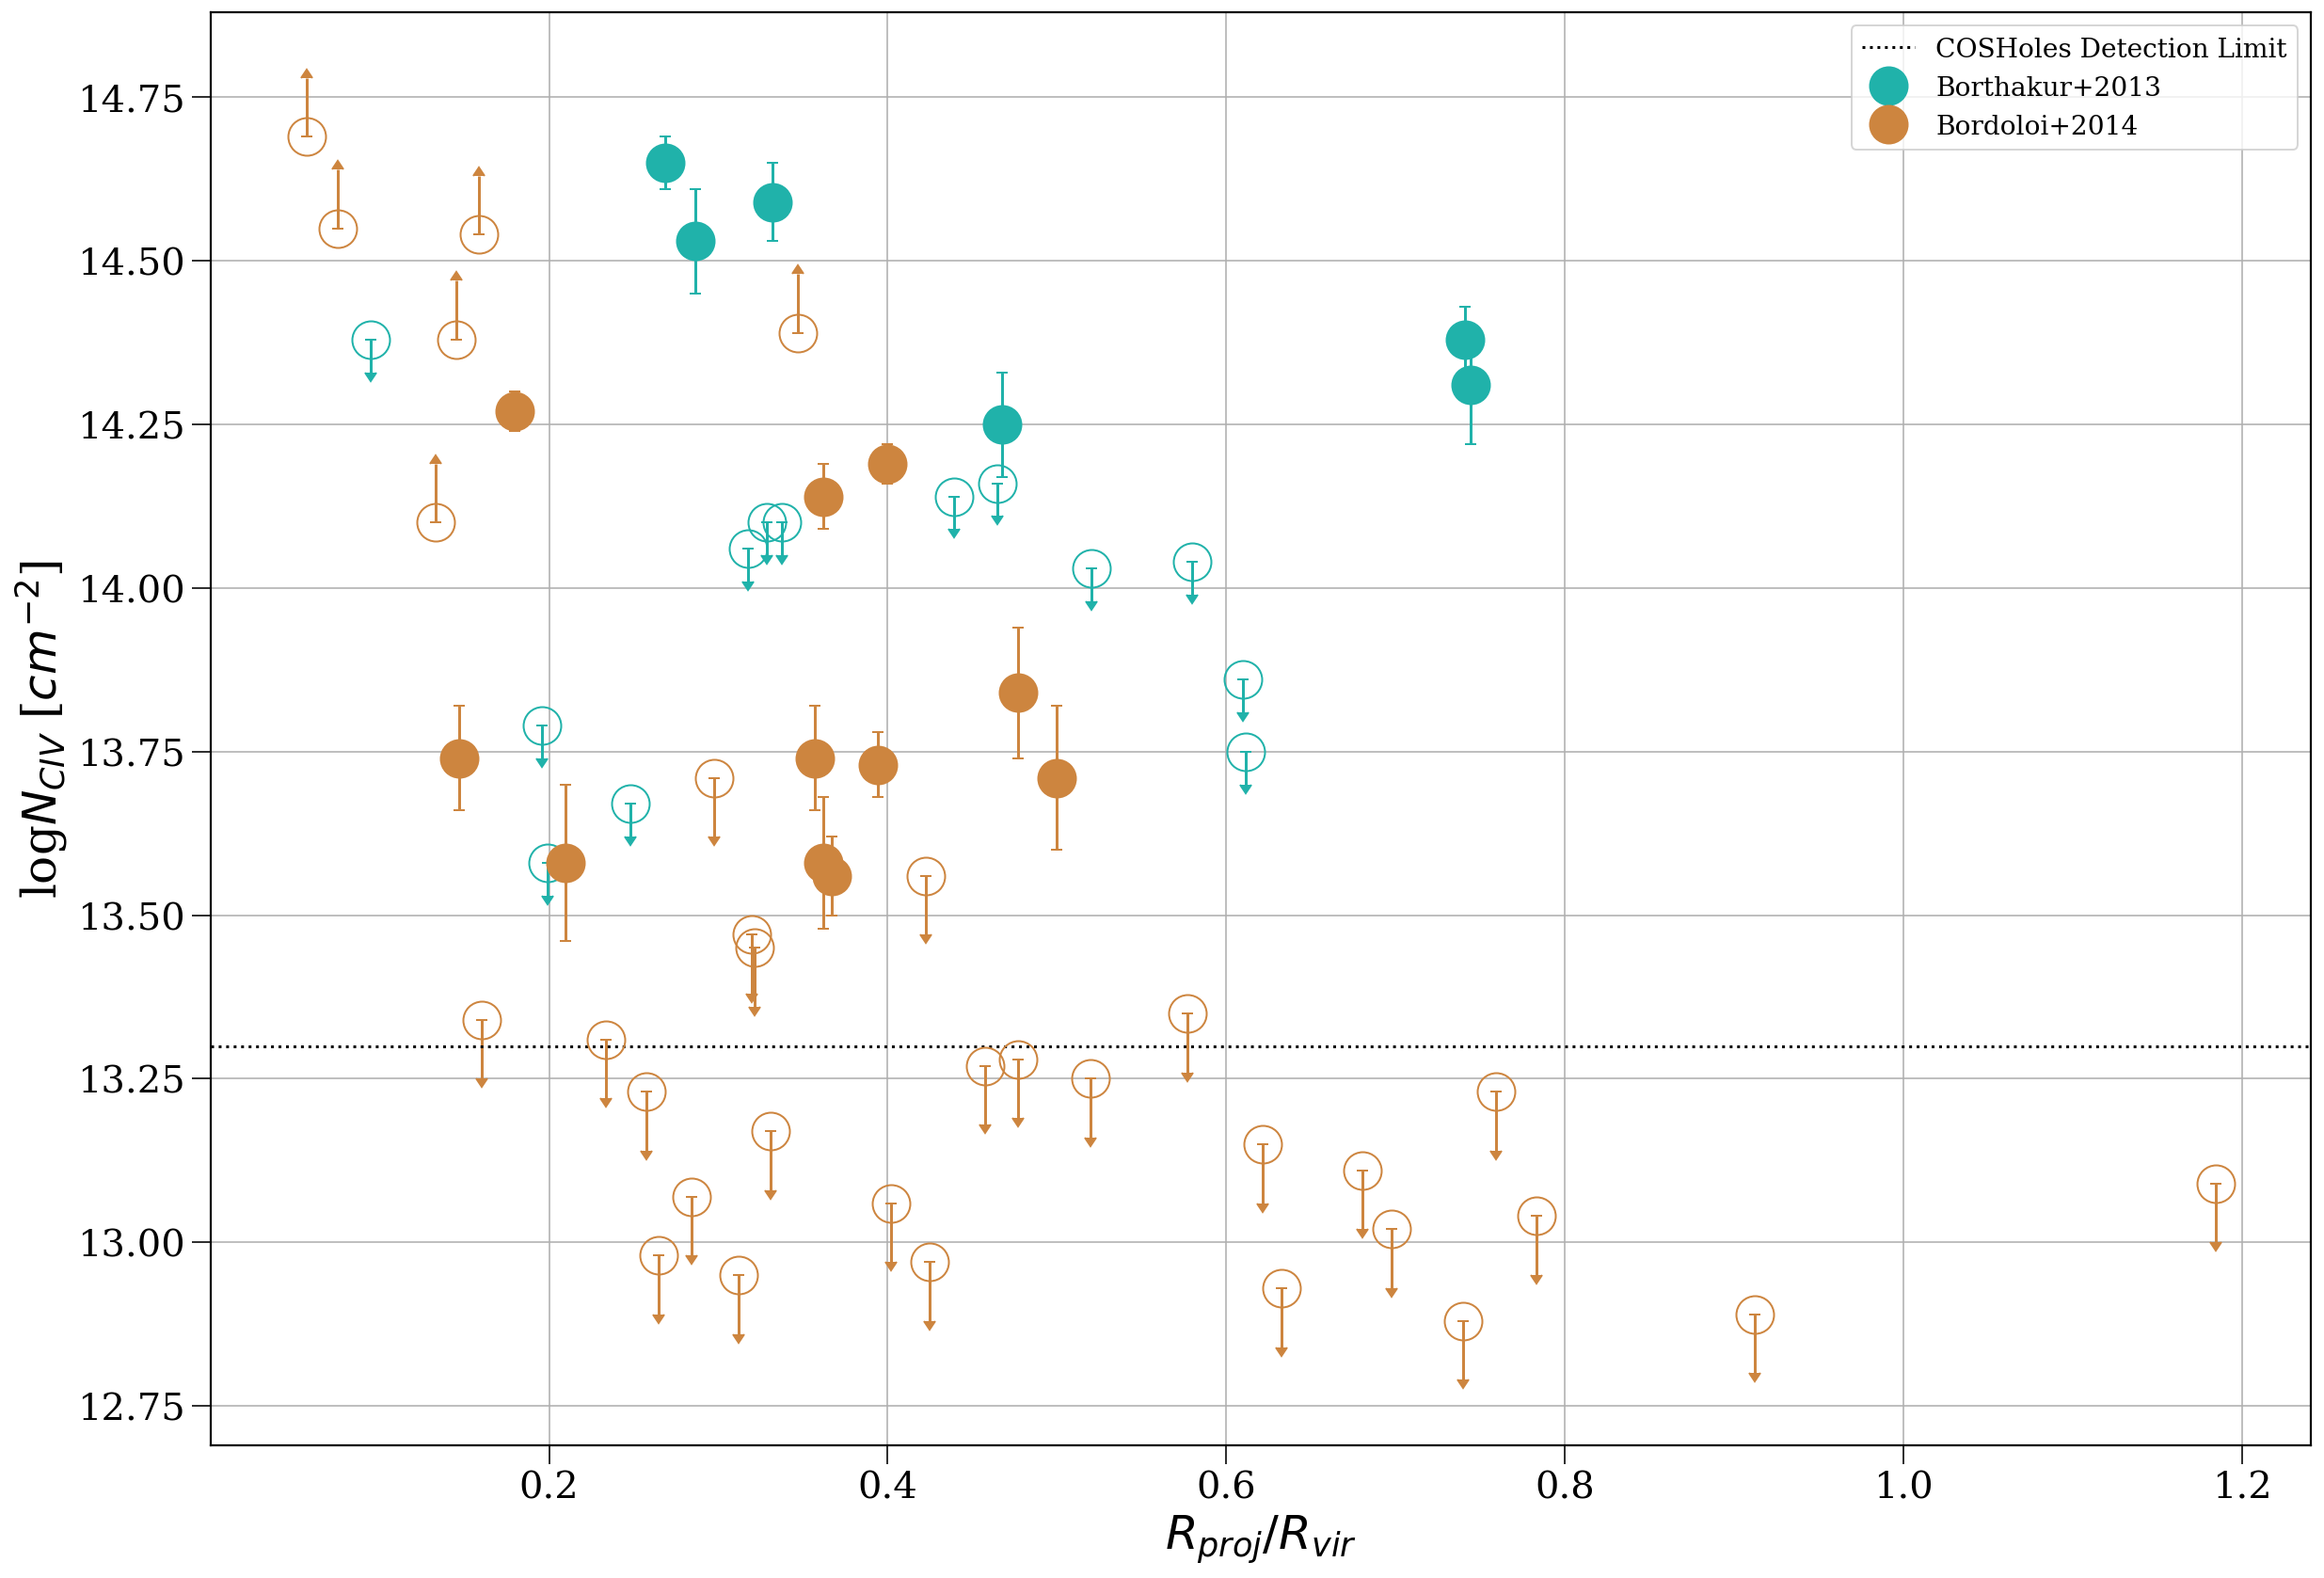

In [11]:
#Just plotting the data for fun before I start 

########Borthakur 2013
#Non-Detections
plt.errorbar(RpRv_B13[:13], civ_B13[:13], yerr = civ_err_B13[14], capsize=3, c = 'lightseagreen', 
             marker = 'o', markersize=20, ls='none', mfc='none', uplims=True)
#Detections
plt.errorbar(RpRv_B13[13:], civ_B13[13:], yerr = civ_err_B13[13:], capsize=3, c = 'lightseagreen', label = 'Borthakur+2013', 
             marker = 'o', markersize=20, ls='none')

#######Bordoloi 2014
#Non-Detections
plt.errorbar(RpRv_B14[:26], civ_B14[:26], yerr = civ_err_B13[15], capsize=3, c = 'peru', 
            marker = 'o', markersize = 20, ls='none', mfc='none', uplims=True)
plt.errorbar(RpRv_B14[37:], civ_B14[37:], yerr = civ_err_B13[15], capsize=3, c = 'peru', 
            marker = 'o', markersize = 20, ls='none', mfc='none', lolims=True)
#Detections
plt.errorbar(RpRv_B14[26:37], civ_B14[26:37], yerr = civ_err_B14[26:37], capsize=3, c = 'peru', label = 'Bordoloi+2014', 
            marker = 'o', markersize = 20, ls='none')


plt.xlabel('$R_{proj} / R_{vir}$ ')
plt.ylabel('log$N_{CIV}$ [$cm^{-2}$]')
plt.axhline(13.3, c='k', ls=':', label='COSHoles Detection Limit')
#plt.ylim(12.6,15)
#plt.xscale("log")
plt.legend()
plt.grid(True)
plt.show()

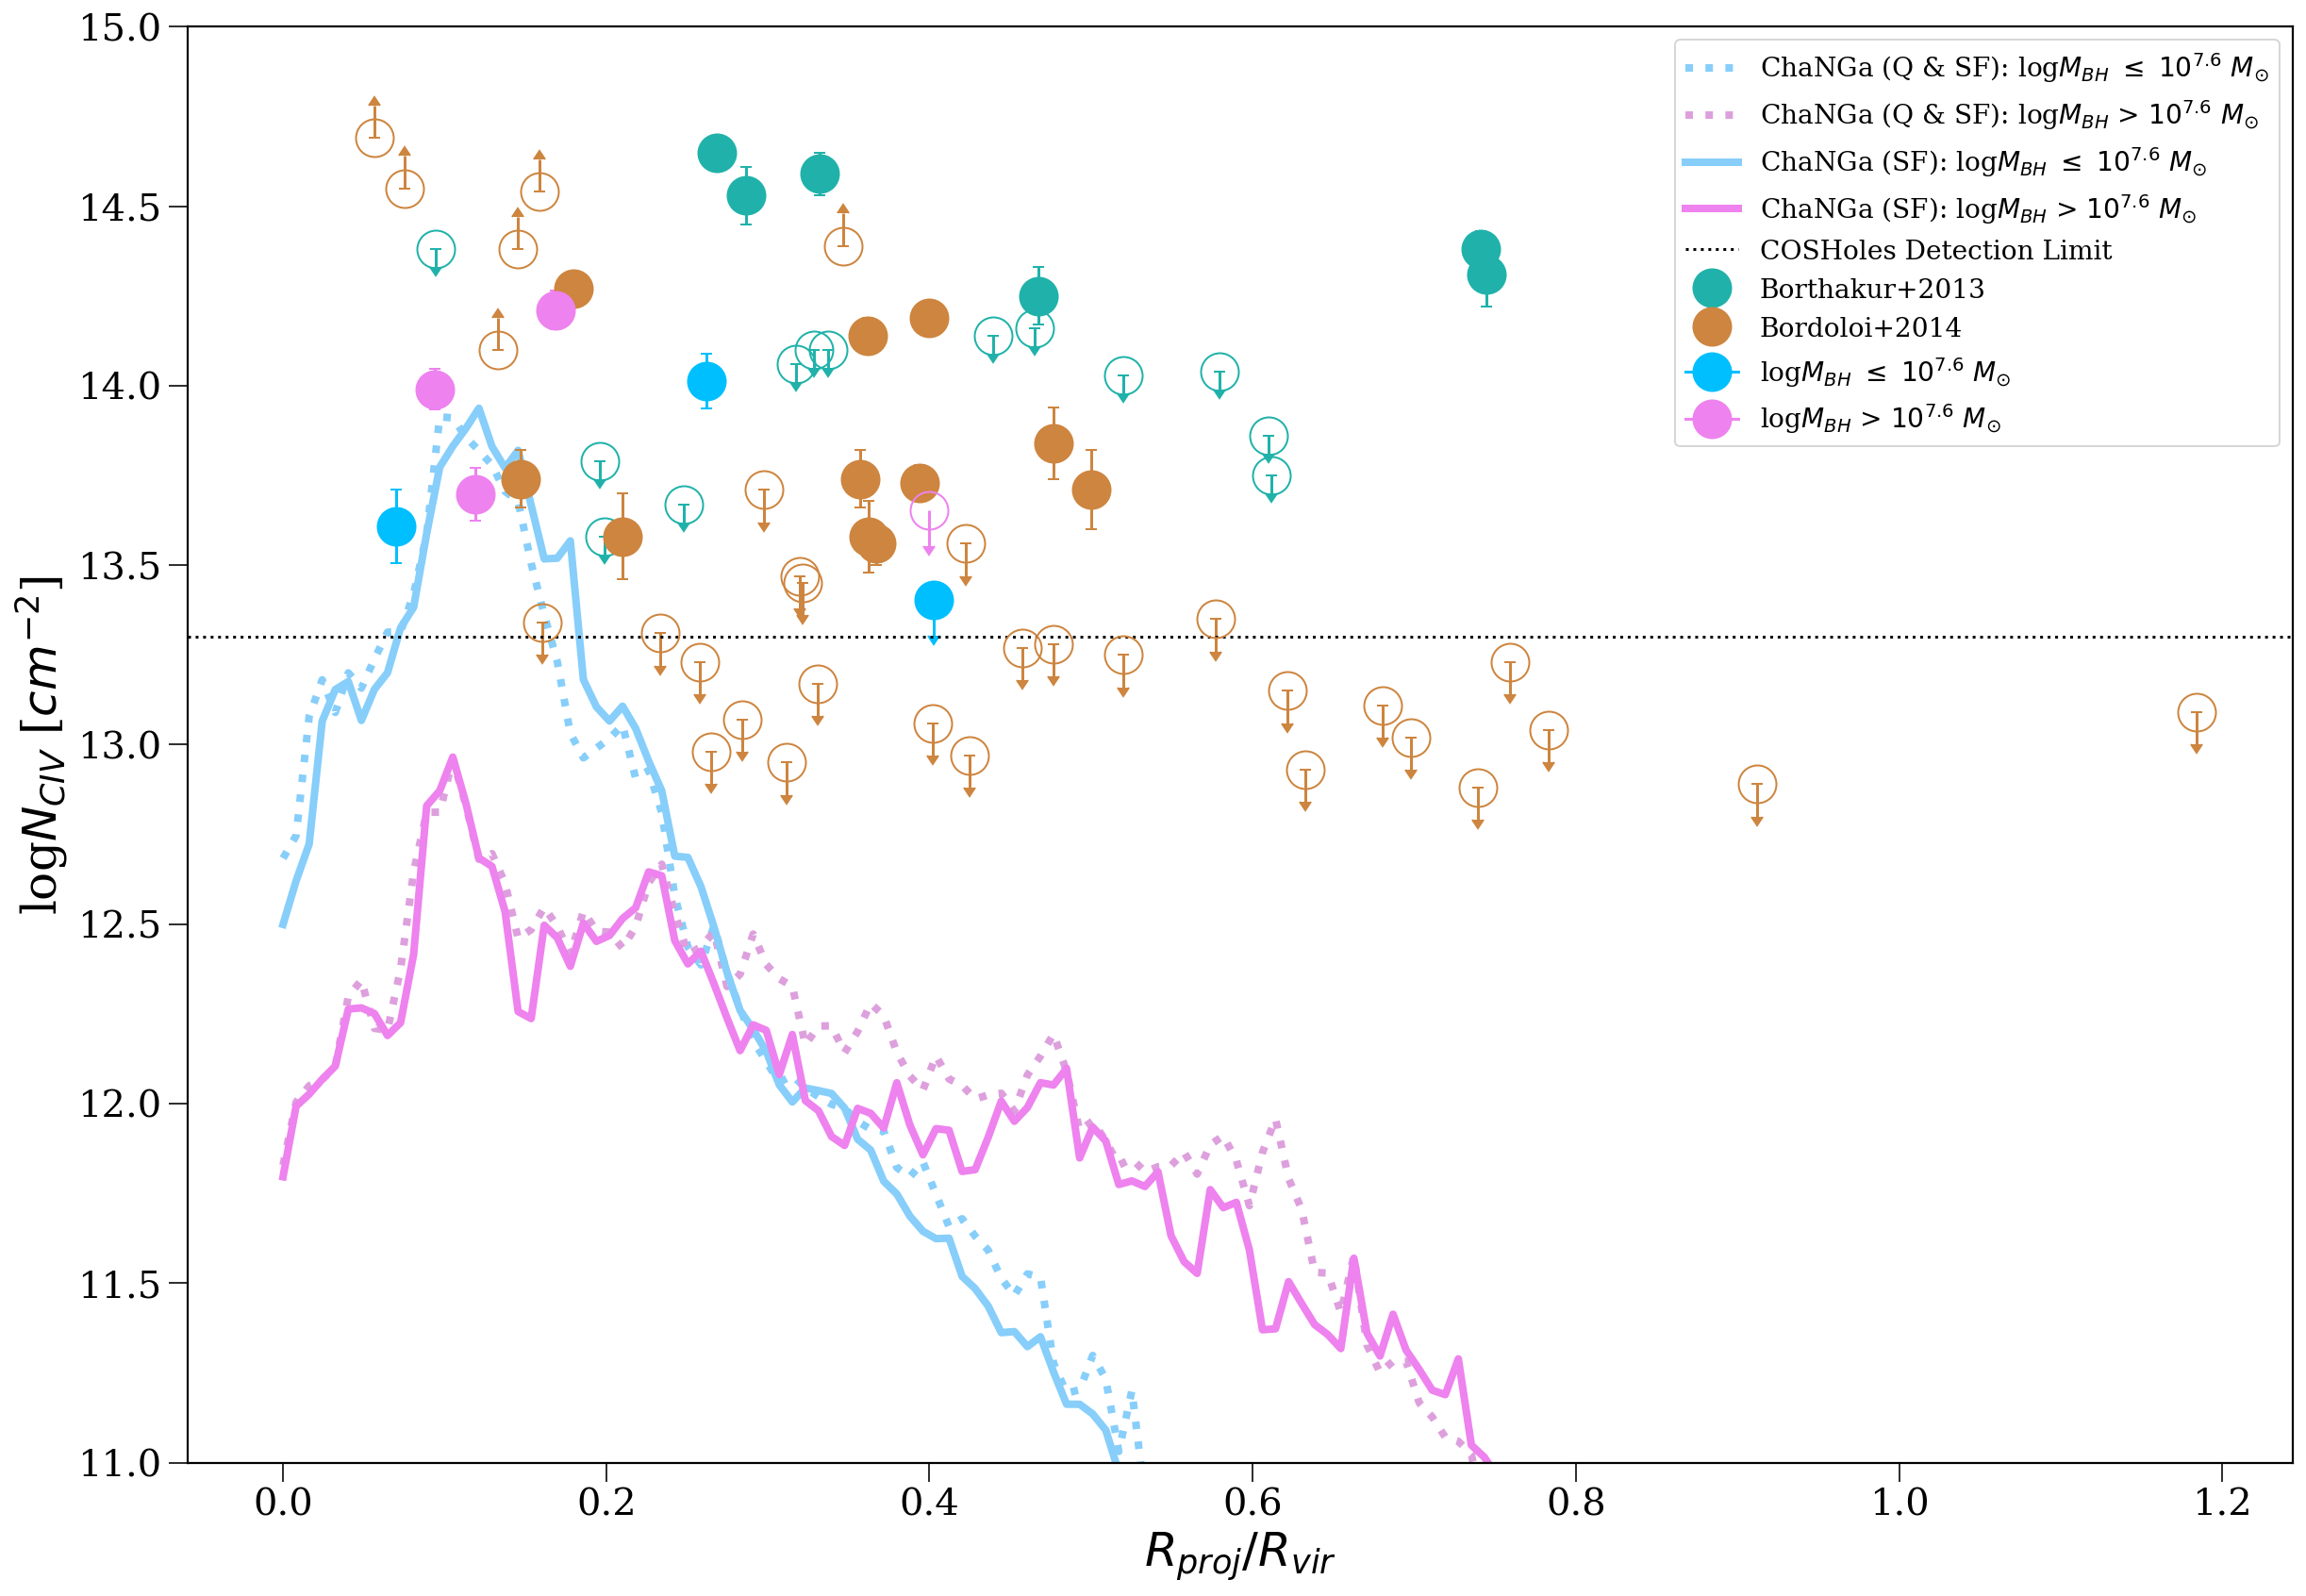

In [19]:
#Now I guess we can start plotting some things.... Lets make Fig 4 (RHS- N vs Rproj/Rvir) of COS-Holes Proposal

####################################################### MODELS 

#Plotting the models from ChaNGa: Romulus25 cosmological volume, Tremmel et. al 2017
plt.plot(r25_rprv,r25_lowBH_civ, c = 'lightskyblue', linewidth = 4, ls = ':',
         label = 'ChaNGa (Q & SF): log$M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$')
plt.plot(r25_rprv,r25_highBH_civ, c = 'plum', linewidth = 4, ls = ':',
         label = 'ChaNGa (Q & SF): log$M_{BH}$ > $10^{7.6}$ $M_{\odot}$')

########### Plotting Nicole's ChaNGA Models (Starforming) => Romulus25 cosmological volume, Tremmel et. al 2017
plt.plot(CC_rprv,CC_lowBH_civ, c = 'lightskyblue', linewidth = 4, 
         label = 'ChaNGa (SF): log$M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$')
plt.plot(CC_rprv,CC_highBH_civ, c = 'violet', linewidth = 4, 
         label = 'ChaNGa (SF): log$M_{BH}$ > $10^{7.6}$ $M_{\odot}$')

####################################################### LITERATURE DATA

########Borthakur 2013
#Non-Detections
plt.errorbar(RpRv_B13[:13], civ_B13[:13], yerr = civ_err_B13[14], capsize=3, c = 'lightseagreen', 
             marker = 'o', markersize=20, ls='none', mfc='none', uplims=True)
#Detections
plt.errorbar(RpRv_B13[13:], civ_B13[13:], yerr = civ_err_B13[13:], capsize=3, c = 'lightseagreen', label = 'Borthakur+2013', 
             marker = 'o', markersize=20, ls='none')

#######Bordoloi 2014
#Non-Detections
plt.errorbar(RpRv_B14[:26], civ_B14[:26], yerr = civ_err_B13[15], capsize=3, c = 'peru', 
            marker = 'o', markersize = 20, ls='none', mfc='none', uplims=True)
plt.errorbar(RpRv_B14[37:], civ_B14[37:], yerr = civ_err_B13[15], capsize=3, c = 'peru', 
            marker = 'o', markersize = 20, ls='none', mfc='none', lolims=True)
#Detections
plt.errorbar(RpRv_B14[26:37], civ_B14[26:37], yerr = civ_err_B14[26:37], capsize=3, c = 'peru', label = 'Bordoloi+2014', 
            marker = 'o', markersize = 20, ls='none')

#######################################################

########### Plotting COS-Holes Data

#J1159
plt.errorbar(rproj[1]/rvir[1], civ_df_J1159['N'][0], yerr=civ_df_J1159['sigN'][0], capsize = 3, c = 'violet', 
             marker=".", markersize=40)

#J1249
plt.errorbar(rproj[4]/rvir[4], civ_df_J1249['N'][6], yerr= civ_df_J1249['sigN'][6], capsize = 3, c = 'deepskyblue',
             label = 'log$M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)

#J1051
plt.errorbar(rproj[5]/rvir[5], civ_df_J1051['N'][6], yerr= civ_df_J1051['sigN'][6],capsize = 3, c = 'violet', 
             label = 'log$M_{BH}$ > $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)

#J1123
plt.errorbar(rproj[6]/rvir[6], civ_df_J1123['N'][2], yerr=civ_df_J1123['sigN'][2],capsize = 3, c = 'deepskyblue',
             marker=".", markersize=40)

#J0246
plt.errorbar(rproj[7]/rvir[7], civ_df_J0246['N'][2], civ_df_J0246['sigN'][2], capsize = 3, c = 'violet',
             marker=".", markersize=40)

##################################################################
##### Upper Limits

#J1101 - NGC 3489 (0) (DETECTION UPPER LIMIT)
plt.errorbar(rproj[0]/rvir[0], civ_df_J1101['N'][4], yerr=civ_df_J1101['sigN'][4], uplims=True, c = 'deepskyblue', 
             marker=".", markersize=40)

#J1235 - NGC 4564 (8)
plt.errorbar (rproj[8]/rvir[8], np.log10(10**13.17+10**13.48), yerr=civ_df_J1101['sigN'][4],uplims=True, c = 'violet', 
              marker=".",mfc='none',markersize=40)

plt.axhline(13.3, c='k', ls=':', label='COSHoles Detection Limit')
#plt.axvline(150, c='k', ls='-')
plt.ylim(11, 15)
#plt.xlim(0, 0.5)
plt.xlabel ('$R_{proj}/R_{vir}$')
plt.ylabel ('log$N_{CIV}$ [$cm^{-2}$]')
plt.legend(loc=1)
#plt.grid(True)
plt.show()

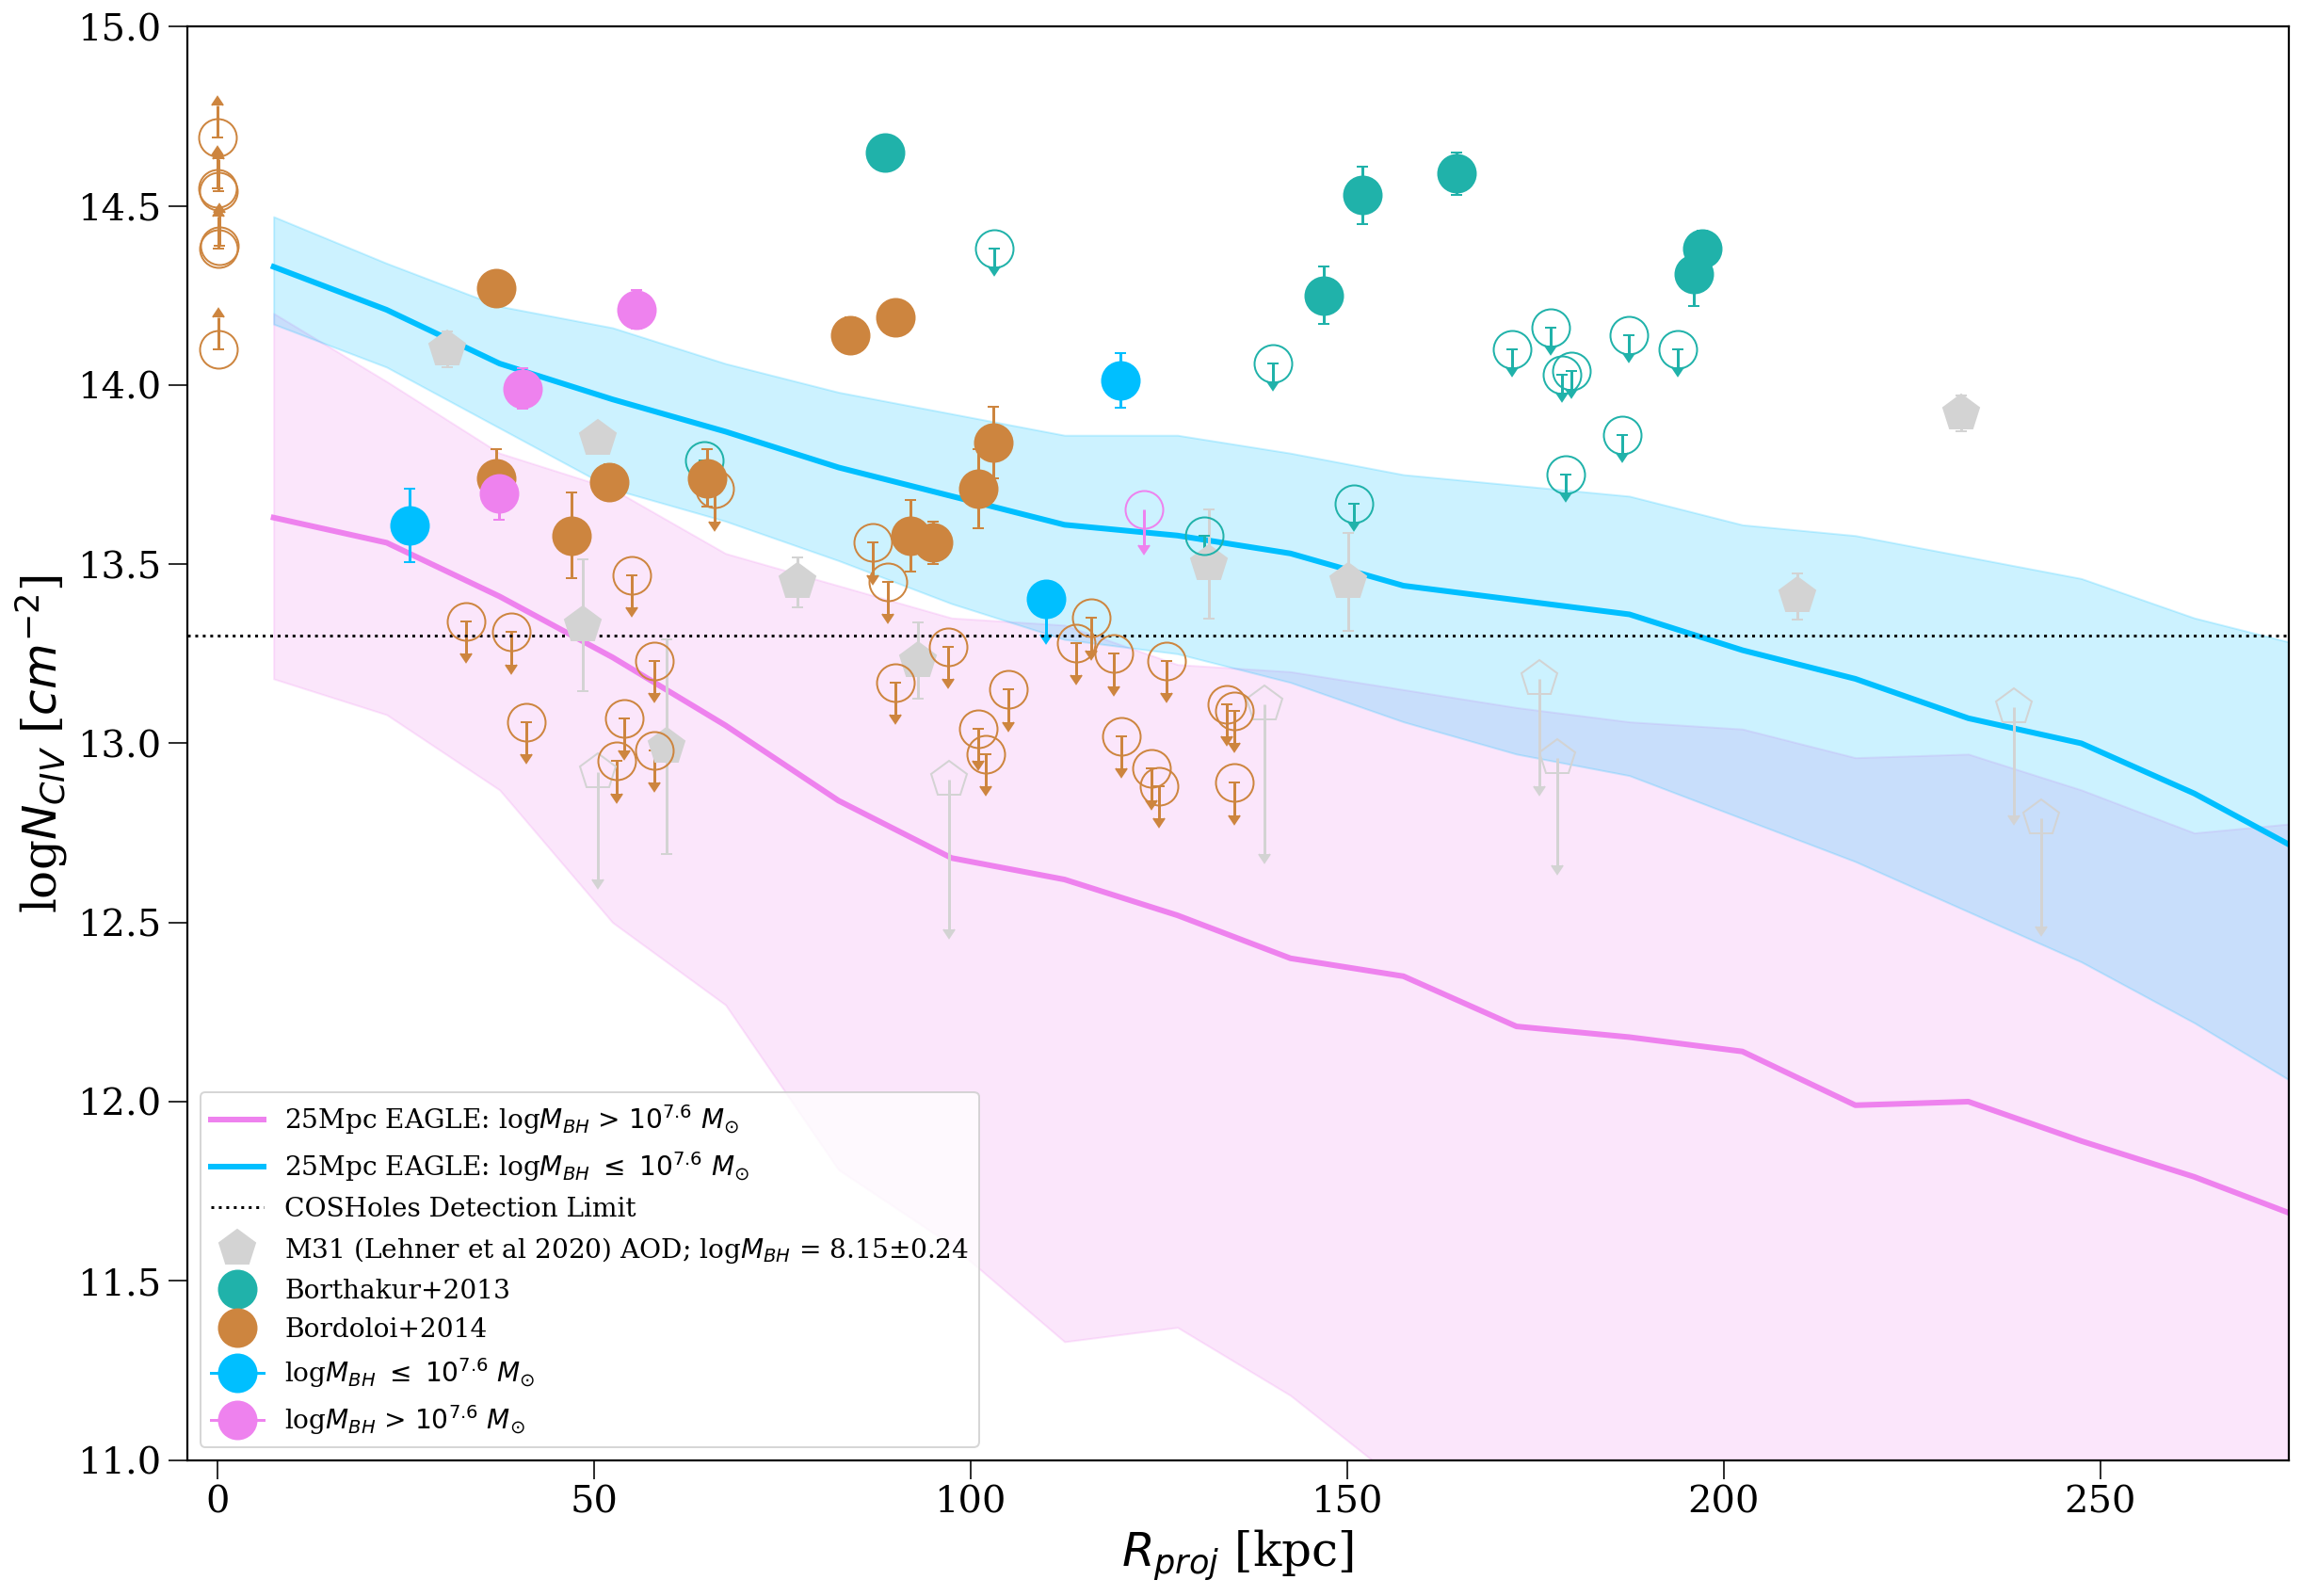

In [22]:
#Now I guess we can start plotting some things.... Lets make Fig 4 (LHS- N vs Rproj) of COS-Holes Proposal

####################################################### MODEL

########### Plotting Ben's Data 

plt.fill_between(b_benHbh, ben_25Hbh, ben_75Hbh, alpha = 0.2, color = 'violet')
plt.plot(b_benHbh, med_benHbh, color = 'violet', lw = 3, label = '25Mpc EAGLE: log$M_{BH}$ > $10^{7.6}$ $M_{\odot}$')
plt.fill_between(b_benLbh, ben_25Lbh, ben_75Lbh, alpha = 0.2, color = 'deepskyblue')
plt.plot(b_benLbh, med_benLbh, color = 'deepskyblue', lw = 3, label = '25Mpc EAGLE: log$M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$')

plt.figure(1, figsize=(12,8))

######################################################## LITERATURE DATA

# M31 information from Project AMIGA: 
# BH Mass: https://arxiv.org/pdf/1707.04001.pdf = 8.15+/- 0.24 

##### M31 Detections (Sums) 
plt.errorbar (amiga_2_det_sum['Rad'], amiga_2_det_sum['logN'], yerr=amiga_2_det_sum['sum_elogN'],capsize = 3, c = 'lightgrey', 
              marker="p", markersize=20, label='M31 (Lehner et al 2020) AOD; log$M_{BH}$ = 8.15$\pm$0.24', ls='none')

##### M31 Upper Limits (Sums)
plt.errorbar (amiga_2_up_sum['Rad'], amiga_2_up_sum['logN'], yerr=amiga_2_up_sum['sum_elogN'],uplims=True, c = 'lightgrey', 
              marker="p",mfc='none',markersize=20, ls='none')

########Borthakur 2013
#Non-Detections
plt.errorbar(Rp_B13[:13], civ_B13[:13], yerr = civ_err_B13[14], capsize=3, c = 'lightseagreen', 
             marker = 'o', markersize=20, ls='none', mfc='none', uplims=True)
#Detections
plt.errorbar(Rp_B13[13:], civ_B13[13:], yerr = civ_err_B13[13:], capsize=3, c = 'lightseagreen', label = 'Borthakur+2013', 
             marker = 'o', markersize=20, ls='none')

#######Bordoloi 2014
#Non-Detections
plt.errorbar(Rp_B14[:26], civ_B14[:26], yerr = civ_err_B13[15], capsize=3, c = 'peru', 
            marker = 'o', markersize = 20, ls='none', mfc='none', uplims=True)
plt.errorbar(RpRv_B14[37:], civ_B14[37:], yerr = civ_err_B13[15], capsize=3, c = 'peru', 
            marker = 'o', markersize = 20, ls='none', mfc='none', lolims=True)
#Detections
plt.errorbar(Rp_B14[26:37], civ_B14[26:37], yerr = civ_err_B14[26:37], capsize=3, c = 'peru', label = 'Bordoloi+2014', 
            marker = 'o', markersize = 20, ls='none')

########################################################

########### Plotting COS-Holes Data

#J1159
plt.errorbar(rproj[1], civ_df_J1159['N'][0], yerr=civ_df_J1159['sigN'][0], capsize = 3, c = 'violet', 
             marker=".", markersize=40)

#J1249
plt.errorbar(rproj[4], civ_df_J1249['N'][6], yerr= civ_df_J1249['sigN'][6], capsize = 3, c = 'deepskyblue',
             label = 'log$M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)

#J1051
plt.errorbar(rproj[5], civ_df_J1051['N'][6], yerr= civ_df_J1051['sigN'][6],capsize = 3, c = 'violet', 
             label = 'log$M_{BH}$ > $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)

#J1123
plt.errorbar(rproj[6], civ_df_J1123['N'][2], yerr=civ_df_J1123['sigN'][2],capsize = 3, c = 'deepskyblue',
             marker=".", markersize=40)

#J0246
plt.errorbar(rproj[7], civ_df_J0246['N'][2], civ_df_J0246['sigN'][2], capsize = 3, c = 'violet',
             marker=".", markersize=40)

##################################################################
##### Upper Limits

#J1101 - NGC 3489 (0) (DETECTION UPPER LIMIT)
plt.errorbar(rproj[0], civ_df_J1101['N'][4], yerr=civ_df_J1101['sigN'][4], uplims=True, c = 'deepskyblue', 
             marker=".", markersize=40)

#J1235 - NGC 4564 (8)
plt.errorbar (rproj[8], np.log10(10**13.17+10**13.48), yerr=civ_df_J1101['sigN'][4],uplims=True, c = 'violet', 
              marker=".",mfc='none',markersize=40)

plt.axhline(13.3, c='k', ls=':', label='COSHoles Detection Limit')
#plt.axvline(150, c='k', ls='-')
plt.ylim(11, 15)
plt.xlim(-4,275)
plt.xlabel ('$R_{proj}$ [kpc]')
plt.ylabel ('log$N_{CIV}$ [$cm^{-2}$]')
plt.legend(loc=3)
#plt.grid(True)
plt.show()

### Setting up Stellar Mass Bins 

Since we are still seeing a null result I want to investigate how the stellar mass may be impacting the sample so will split the larger sample into 2 stellar mass bins and use data from 0-150 kpc (since that is where we see the most "consistency"

The bins are just gonna be 10^9-10 and 10^10-11, going to see what this looks like first and then maybe just keep up to 150 kpc 

In [25]:
#Separating for the Borthakur data sample first 
borthakur_sample = borthakur_no_zero.loc[(borthakur_no_zero['rhokpc[i]'] <= 150)]
borthakur_sample.sort_values('det', inplace=True) #sorted by det so easy to do upper limits 

#This runs from 10.13-11.39 so it is just in the high mass bin (20 or so values total)
borthakur_high = borthakur_sample #impact parameter goes fro 64.7-197.2 so if just 150 kpc (6, 7 if do 151 kpc)
borthakur_high

/Users/samgarza/opt/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,galname[i],mstar[i],alog10(mhalo[i]),rvir[i],rhokpc[i],rhokpc[i]/rvir[i],logNCIV[i],err,det
17,J161708.92+063822.2,11.39,13.585581,1090.91560,103.2,0.094599,14.38,0.00,0
16,J154527.12+484642.2,10.50,12.029020,330.32571,64.7,0.195867,13.79,0.00,0
13,J132150.89+033034.1,10.81,12.408067,441.86569,140.2,0.317291,14.06,0.00,0
19,J230842.91-091112.8,11.09,12.928177,658.65584,131.0,0.198890,13.58,0.00,0
8,J102846.43+391842.9,10.50,12.029020,330.32571,88.7,0.268523,14.65,0.04,1
14,J140502.20+470525.9,10.43,11.964435,314.35077,146.9,0.467312,14.25,0.08,1


In [26]:
#Bringing in the Bordoloi data and separating them into the mass bins that I have decided and then organizing them by det and non det 
#Bringing in known Bordoloi 2014 Data 
    #This runs from 8.2-10.1 so if just look at 9-10 there is a LOT 
#bordoloi = pd.read_csv("bordoloi_2014_CIV.csv", sep=",") 
bordoloi = bordoloi.loc[(bordoloi['R[kpc]'] <= 150) & (bordoloi['logM*'] >= 9) ]
bordoloi.sort_values('det', inplace=True)

bordoloi_low = bordoloi.loc[(bordoloi['logM*'] >= 9) & (bordoloi['logM*'] < 10)]
bordoloi_high = bordoloi.loc[(bordoloi['logM*'] >= 10)]

bordoloi_low

/Users/samgarza/opt/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,QSO,logNCIV,err,det,logM*,R[kpc],Rvir[kpc],R/Rvir
21,PG1049-005,12.98,0.00,0,9.6,58,219,0.264840
20,J0947+1005,13.02,0.00,0,9.0,120,172,0.697674
17,J0809+4619,12.88,0.00,0,9.0,125,169,0.739645
19,J0912+2957,12.97,0.00,0,9.8,102,240,0.425000
42,J1103+4141,13.34,0.00,0,9.5,33,206,0.160194
41,J0212-0737,12.95,0.00,0,9.0,53,170,0.311765
32,J1357+1704,12.93,0.00,0,9.3,124,196,0.632653
40,J1342+3829,13.07,0.00,0,9.2,54,190,0.284211
39,J1104+3141,13.23,0.00,0,9.7,58,225,0.257778
38,J1117+2634,13.28,0.00,0,9.8,114,239,0.476987


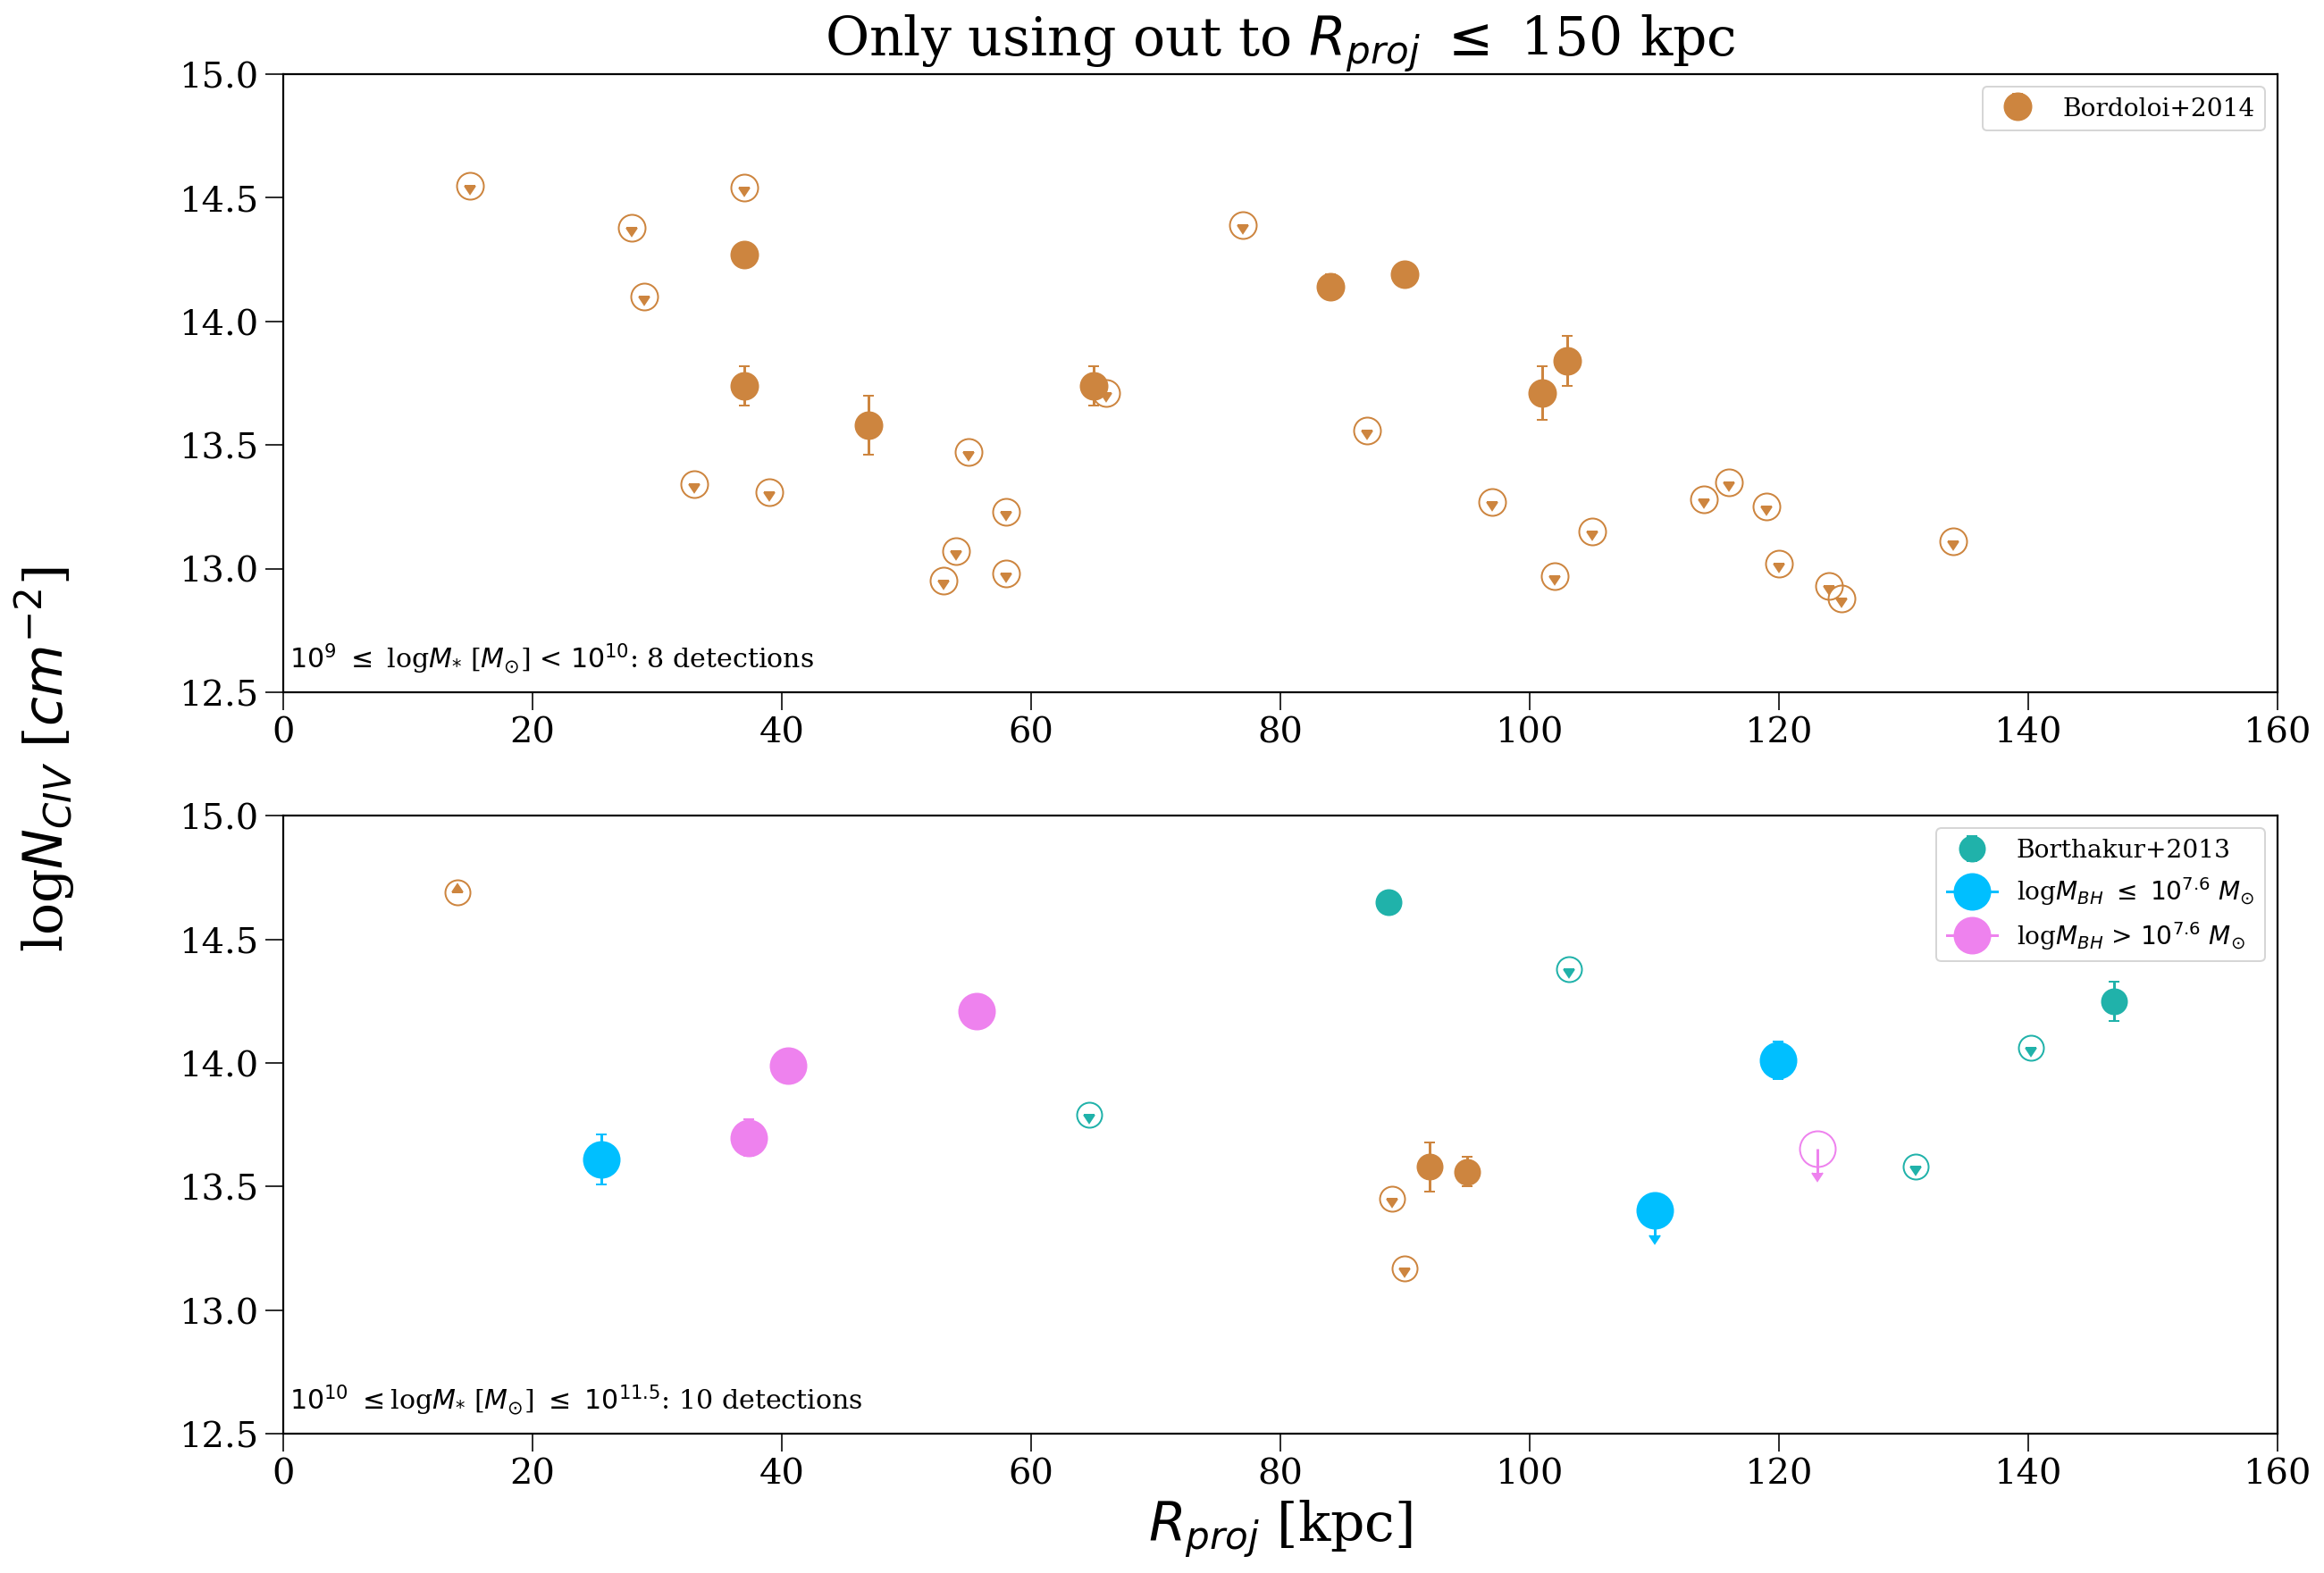

In [28]:
#This is the least automated part of the work but can make minor adjustments since the rest of this is so automated 
fig, axs = plt.subplots(2)
#handles, labels = ax.get_legend_handles_labels()
fig.supylabel('log$N_{CIV}$ [$cm^{-2}$]', fontsize=30)

################ Low Bin Stellar Mass ##############
    #Bordoloi
#Non-Detections
axs[0].errorbar(bordoloi_low['R[kpc]'][:19], bordoloi_low['logNCIV'][:19], yerr = bordoloi_low['err'][:19], capsize=3, c = 'peru', 
            marker = 'o', markersize = 15, ls='none', mfc='none', uplims=True) #upper limit
axs[0].errorbar(bordoloi_low['R[kpc]'][27:], bordoloi_low['logNCIV'][27:], yerr = bordoloi_low['err'][27:], capsize=3, c = 'peru', 
            marker = 'o', markersize = 15, ls='none', mfc='none', uplims=True) #lower limit
#Detections
axs[0].errorbar(bordoloi_low['R[kpc]'][19:27], bordoloi_low['logNCIV'][19:27], yerr = bordoloi_low['err'][19:27], capsize=3, c = 'peru', 
            marker = 'o', markersize = 15, ls='none', label = 'Bordoloi+2014') #upper limit
axs[0].set_ylim(12.5,15)
axs[0].set_xlim(0,160)
axs[0].set_title('Only using out to $R_{proj}$ $\leq$ 150 kpc', fontsize=30)
axs[0].annotate('$10^{9}$ $\leq$ log$M_{*}$ [$M_{\odot}$] < $10^{10}$: 8 detections', (0.5, 12.6), fontsize=15)
axs[0].legend(loc=1)

############### High Bin Stellar Mass ##############

#Non-Detections
    #Bordoloi
axs[1].errorbar(bordoloi_high['R[kpc]'][:2], bordoloi_high['logNCIV'][:2], yerr = bordoloi_high['err'][:2], capsize=3, c = 'peru', 
            marker = 'o', markersize = 14, ls='none', mfc='none', uplims=True) #upper limit
axs[1].errorbar(bordoloi_high['R[kpc]'][4:], bordoloi_high['logNCIV'][4:], yerr = bordoloi_high['err'][4:], capsize=3, c = 'peru', 
            marker = 'o', markersize = 14, ls='none', mfc='none', lolims=True) #lower limit 
    #Borthakur 
axs[1].errorbar(borthakur_high['rhokpc[i]'][:4], borthakur_high['logNCIV[i]'][:4], yerr = borthakur_high['err'][:4], capsize=3, 
                c = 'lightseagreen', marker = 'o', markersize = 14, ls='none', mfc='none', uplims=True) #upper limit
#Detections
    #Bordoloi
axs[1].errorbar(bordoloi_high['R[kpc]'][2:4], bordoloi_high['logNCIV'][2:4], yerr = bordoloi_high['err'][2:4], capsize=3, c = 'peru', 
            marker = 'o', markersize = 14, ls='none')
    #Borthakur
axs[1].errorbar(borthakur_high['rhokpc[i]'][4:], borthakur_high['logNCIV[i]'][4:], yerr = borthakur_high['err'][4:], capsize=3, 
                c = 'lightseagreen', marker = 'o', markersize = 14, ls='none', label = 'Borthakur+2013') 

#####COS-HOLES DATA#####
#J1159
plt.errorbar(rproj[1], civ_df_J1159['N'][0], yerr=civ_df_J1159['sigN'][0], capsize = 3, c = 'violet', 
             marker=".", markersize=40)

#J1249
plt.errorbar(rproj[4], civ_df_J1249['N'][6], yerr= civ_df_J1249['sigN'][6], capsize = 3, c = 'deepskyblue',
             label = 'log$M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)

#J1051
plt.errorbar(rproj[5], civ_df_J1051['N'][6], yerr= civ_df_J1051['sigN'][6],capsize = 3, c = 'violet', 
             label = 'log$M_{BH}$ > $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)

#J1123
plt.errorbar(rproj[6], civ_df_J1123['N'][2], yerr=civ_df_J1123['sigN'][2],capsize = 3, c = 'deepskyblue',
             marker=".", markersize=40)

#J0246
plt.errorbar(rproj[7], civ_df_J0246['N'][2], civ_df_J0246['sigN'][2], capsize = 3, c = 'violet',
             marker=".", markersize=40)

##################################################################
##### Upper Limits

#J1101 - NGC 3489 (0) (DETECTION UPPER LIMIT)
plt.errorbar(rproj[0], civ_df_J1101['N'][4], yerr=civ_df_J1101['sigN'][4], uplims=True, c = 'deepskyblue', 
             marker=".", markersize=40)

#J1235 - NGC 4564 (8)
plt.errorbar (rproj[8], np.log10(10**13.17+10**13.48), yerr=civ_df_J1101['sigN'][4],uplims=True, c = 'violet', 
              marker=".",mfc='none',markersize=40)

axs[1].set_xlim(0,160)
axs[1].set_ylim(12.5,15)
axs[1].legend(loc=1)
axs[1].annotate('$10^{10}$ $\leq $log$M_{*}$ [$M_{\odot}$] $\leq$ $10^{11.5}$: 10 detections', (0.5, 12.6), fontsize=15)
axs[1].set_xlabel('$R_{proj}$ [kpc]', fontsize=30)
plt.show()

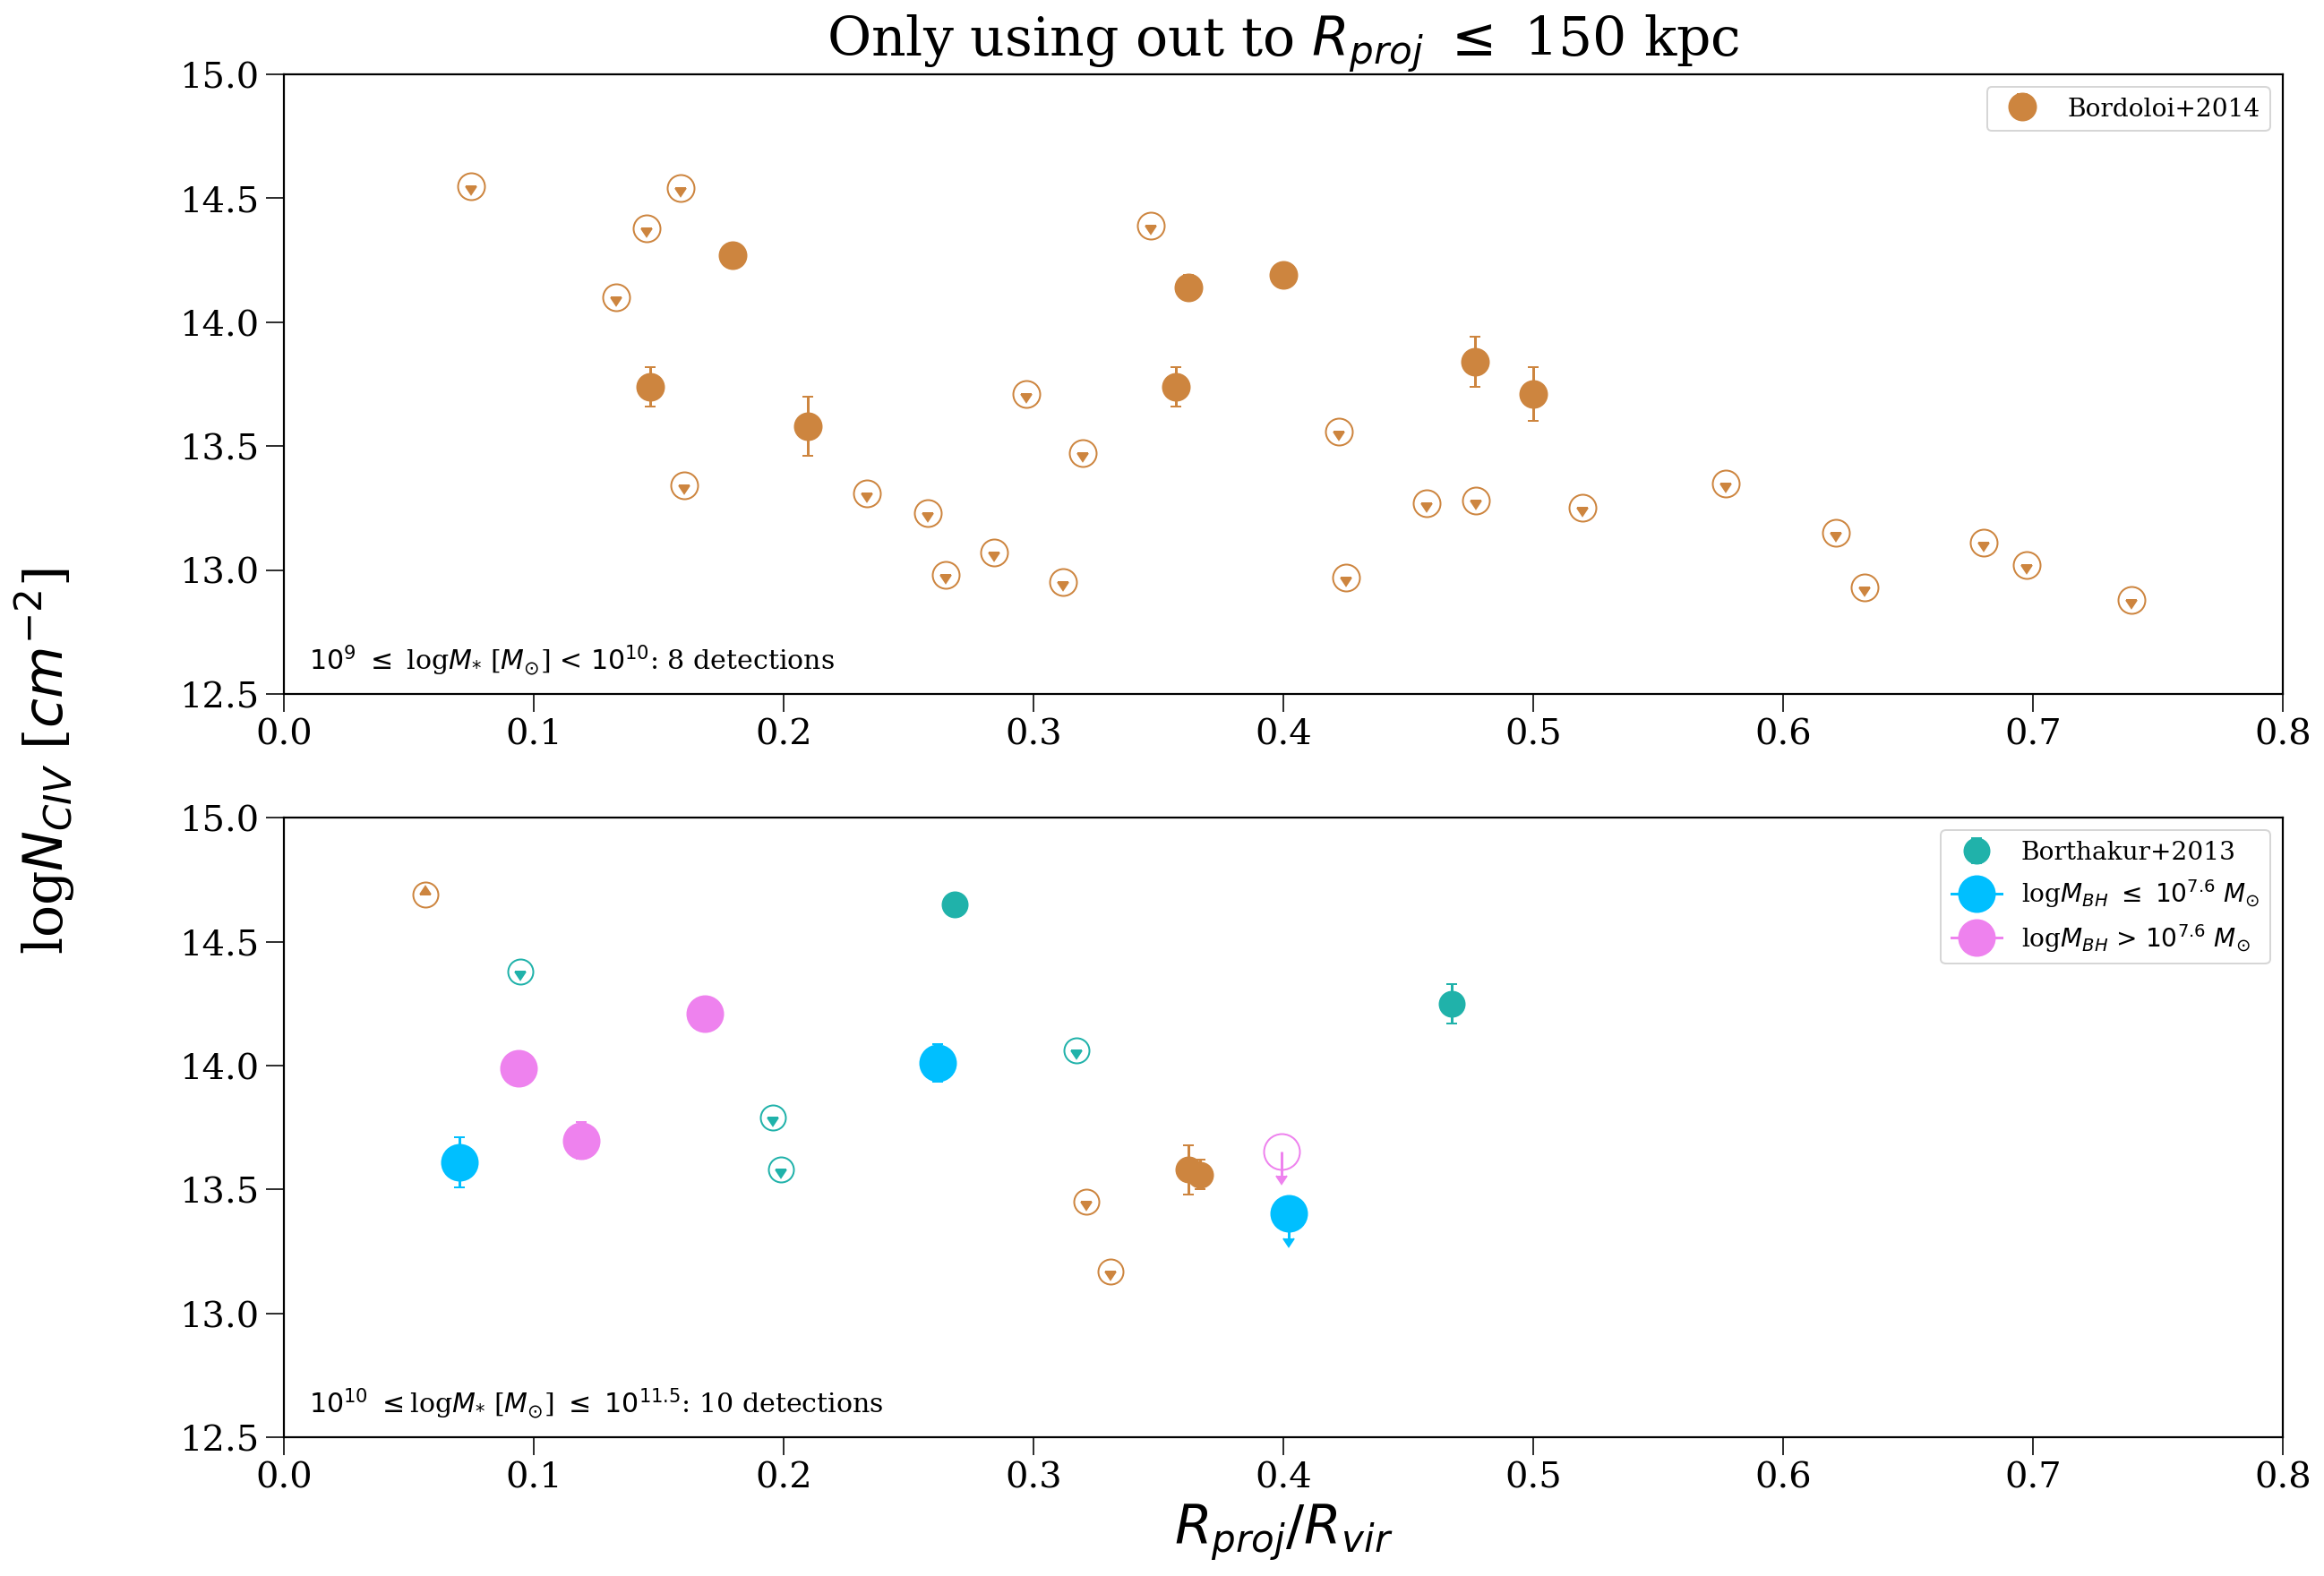

In [29]:
#This is the least automated part of the work but can make minor adjustments since the rest of this is so automated 
fig, axs = plt.subplots(2)
#handles, labels = ax.get_legend_handles_labels()
fig.supylabel('log$N_{CIV}$ [$cm^{-2}$]', fontsize=30)

################ Low Bin Stellar Mass ##############
    #Bordoloi
#Non-Detections
axs[0].errorbar(bordoloi_low['R/Rvir'][:19], bordoloi_low['logNCIV'][:19], yerr = bordoloi_low['err'][:19], capsize=3, c = 'peru', 
            marker = 'o', markersize = 15, ls='none', mfc='none', uplims=True) #upper limit
axs[0].errorbar(bordoloi_low['R/Rvir'][27:], bordoloi_low['logNCIV'][27:], yerr = bordoloi_low['err'][27:], capsize=3, c = 'peru', 
            marker = 'o', markersize = 15, ls='none', mfc='none', uplims=True) #lower limit
#Detections
axs[0].errorbar(bordoloi_low['R/Rvir'][19:27], bordoloi_low['logNCIV'][19:27], yerr = bordoloi_low['err'][19:27], capsize=3, c = 'peru', 
            marker = 'o', markersize = 15, ls='none', label = 'Bordoloi+2014') #upper limit
axs[0].set_ylim(12.5,15)
axs[0].set_xlim(0,0.8)
axs[0].set_title('Only using out to $R_{proj}$ $\leq$ 150 kpc', fontsize=30)
axs[0].annotate('$10^{9}$ $\leq$ log$M_{*}$ [$M_{\odot}$] < $10^{10}$: 8 detections', (0.01, 12.6), fontsize=15)
axs[0].legend(loc=1)

############### High Bin Stellar Mass ##############

#Non-Detections
    #Bordoloi
axs[1].errorbar(bordoloi_high['R/Rvir'][:2], bordoloi_high['logNCIV'][:2], yerr = bordoloi_high['err'][:2], capsize=3, c = 'peru', 
            marker = 'o', markersize = 14, ls='none', mfc='none', uplims=True) #upper limit
axs[1].errorbar(bordoloi_high['R/Rvir'][4:], bordoloi_high['logNCIV'][4:], yerr = bordoloi_high['err'][4:], capsize=3, c = 'peru', 
            marker = 'o', markersize = 14, ls='none', mfc='none', lolims=True) #lower limit 
    #Borthakur 
axs[1].errorbar(borthakur_high['rhokpc[i]/rvir[i]'][:4], borthakur_high['logNCIV[i]'][:4], yerr = borthakur_high['err'][:4], capsize=3, 
                c = 'lightseagreen', marker = 'o', markersize = 14, ls='none', mfc='none', uplims=True) #upper limit
#Detections
    #Bordoloi
axs[1].errorbar(bordoloi_high['R/Rvir'][2:4], bordoloi_high['logNCIV'][2:4], yerr = bordoloi_high['err'][2:4], capsize=3, c = 'peru', 
            marker = 'o', markersize = 14, ls='none')
    #Borthakur
axs[1].errorbar(borthakur_high['rhokpc[i]/rvir[i]'][4:], borthakur_high['logNCIV[i]'][4:], yerr = borthakur_high['err'][4:], capsize=3, 
                c = 'lightseagreen', marker = 'o', markersize = 14, ls='none', label = 'Borthakur+2013') 

#####COS-HOLES DATA##### 
#J1159
plt.errorbar(rproj[1]/rvir[1], civ_df_J1159['N'][0], yerr=civ_df_J1159['sigN'][0], capsize = 3, c = 'violet', 
             marker=".", markersize=40)

#J1249
plt.errorbar(rproj[4]/rvir[4], civ_df_J1249['N'][6], yerr= civ_df_J1249['sigN'][6], capsize = 3, c = 'deepskyblue',
             label = 'log$M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)

#J1051
plt.errorbar(rproj[5]/rvir[5], civ_df_J1051['N'][6], yerr= civ_df_J1051['sigN'][6],capsize = 3, c = 'violet', 
             label = 'log$M_{BH}$ > $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)

#J1123
plt.errorbar(rproj[6]/rvir[6], civ_df_J1123['N'][2], yerr=civ_df_J1123['sigN'][2],capsize = 3, c = 'deepskyblue',
             marker=".", markersize=40)

#J0246
plt.errorbar(rproj[7]/rvir[7], civ_df_J0246['N'][2], civ_df_J0246['sigN'][2], capsize = 3, c = 'violet',
             marker=".", markersize=40)

##################################################################
##### Upper Limits

#J1101 - NGC 3489 (0) (DETECTION UPPER LIMIT)
plt.errorbar(rproj[0]/rvir[0], civ_df_J1101['N'][4], yerr=civ_df_J1101['sigN'][4], uplims=True, c = 'deepskyblue', 
             marker=".", markersize=40)

#J1235 - NGC 4564 (8)
plt.errorbar (rproj[8]/rvir[8], np.log10(10**13.17+10**13.48), yerr=civ_df_J1101['sigN'][4],uplims=True, c = 'violet', 
              marker=".",mfc='none',markersize=40)

axs[1].set_xlim(0,0.8)
axs[1].set_ylim(12.5,15)
axs[1].legend(loc=1)
axs[1].annotate('$10^{10}$ $\leq $log$M_{*}$ [$M_{\odot}$] $\leq$ $10^{11.5}$: 10 detections', (0.01, 12.6), fontsize=15)
axs[1].set_xlabel('$R_{proj}/R_{vir}$', fontsize=30)
plt.show()